In [ ]:
# module imports

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 # model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_df = pd.read_csv('/content/drive/My Drive/UNSW_NB15_testing-setaggregateOneCls.csv')
train_df = pd.read_csv('/content/drive/My Drive/UNSW_NB15_training-setaggregateOneCls.csv')

In [ ]:
print(train_df.shape)
print(test_df.shape)
train_df.head()

(82332, 43)
(175341, 43)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,classification
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,Normal
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,Normal
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,Normal
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,Normal
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,Normal


In [ ]:
df = pd.concat([train_df,test_df],axis = 0)
print(df.shape)

(257673, 43)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [ ]:
#NaN values
df.isna().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
classification       0
dtype: int6

In [ ]:
# Data transformation and Processing

print("proto: ",df['proto'].unique())
print("service: ",df['service'].unique())
print("state: ",df['state'].unique())
print("classification: ",df['classification'].unique())

proto:  ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'
 'smp' 'isis' 'ptp' 'fire' 'crtp' 'crudp' 'scco

In [ ]:
df["classification"] = df["classification"].apply(lambda x: 0 if x == "Normal" else 1)

In [ ]:
df["classification"].value_counts()

1    164673
0     93000
Name: classification, dtype: int64

In [ ]:
x = df["proto"].value_counts(sort = True,ascending = False)
print(x)

tcp       123041
udp        92701
unas       15599
arp         3846
ospf        3271
           ...  
netblt       131
rdp          131
igmp          48
icmp          15
rtp            1
Name: proto, Length: 133, dtype: int64


In [ ]:
# picking top three protocols from available set of protocols
protocol = ["tcp","udp","unas"]
df = df.loc[(df["proto"] == "tcp") | (df["proto"] == "udp") | (df["proto"] == "unas")]
df.reset_index(inplace = True,drop  = True)
print(df.shape)

(231341, 43)


In [ ]:
print("state: ",df['state'].unique())

state:  ['INT' 'FIN' 'REQ' 'ACC' 'CON' 'RST' 'CLO']


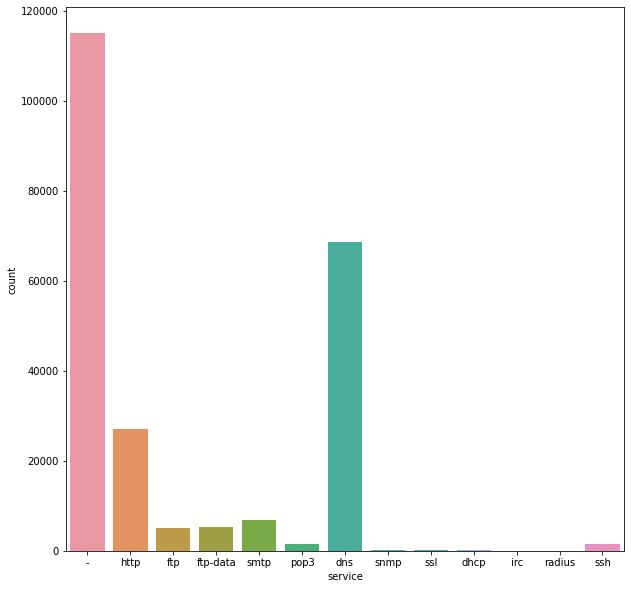

In [ ]:
# In most of the data service is unknown or Unavailable(Around 55%)
plt.figure(figsize = (10,10))
ax = sns.countplot(x = "service",data = df)

In [ ]:
df["service"] = df['service'].apply(lambda x: 'None' if x == '-' else x)
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,classification
0,0.000011,udp,None,INT,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,udp,None,INT,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,udp,None,INT,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,udp,None,INT,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,udp,None,INT,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


In [ ]:
org_df = df.copy()

In [ ]:
#label encoding
tolabelencode = ['proto','service','state']
l = LabelEncoder()
for col in tolabelencode:
  df[col] = l.fit_transform(df[col])

df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,classification
0,0.000011,1,0,4,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,1,0,4,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,1,0,4,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,1,0,4,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,1,0,4,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


In [ ]:
df.describe()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,classification
count,231341.000000,231341.000000,231341.000000,231341.000000,231341.000000,231341.000000,2.313410e+05,2.313410e+05,2.313410e+05,231341.000000,...,231341.000000,231341.000000,231341.000000,231341.000000,231341.000000,231341.000000,231341.000000,231341.000000,231341.000000,231341.000000
mean,0.888538,0.535569,1.733000,3.339386,21.098271,20.601018,9.270004e+03,1.602295e+04,8.506013e+04,176.321923,...,5.568827,4.226907,8.730765,0.014278,0.014312,0.147030,7.111666,9.616359,0.000026,0.615338
std,4.110646,0.619349,2.304672,0.646881,143.171081,118.005731,1.832793e+05,1.542107e+05,1.560088e+05,102.764276,...,8.526322,6.090855,11.580730,0.122435,0.122783,0.718077,8.658776,11.299640,0.005093,0.486516
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,29.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000009,0.000000,0.000000,3.000000,2.000000,0.000000,1.140000e+02,0.000000e+00,3.186044e+01,62.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.016788,0.000000,2.000000,3.000000,8.000000,6.000000,5.640000e+02,2.680000e+02,2.816902e+03,254.000000,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.717951,1.000000,2.000000,4.000000,14.000000,12.000000,1.540000e+03,1.476000e+03,1.111111e+05,254.000000,...,5.000000,3.000000,10.000000,0.000000,0.000000,0.000000,9.000000,13.000000,0.000000,1.000000
max,59.999527,2.000000,12.000000,6.000000,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
# feature Scaling
col = df.columns
min_max = MinMaxScaler()
df = min_max.fit_transform(df)
df = pd.DataFrame(data = df,columns = col)

In [ ]:
#Feature Selection

X = df.iloc[:,0:42]
Y = df.iloc[:,42]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(17,'Score')) 

               Specs         Score
9               sttl  25961.717079
19              swin  13236.445005
22              dwin  11461.886803
12             dload  11357.256980
1              proto  11208.610060
34  ct_dst_sport_ltm   9576.781701
33  ct_src_dport_ltm   7806.596532
8               rate   7125.415097
31      ct_state_ttl   6932.899975
27             dmean   6622.259989
35    ct_dst_src_ltm   6568.727645
20             stcpb   5762.141768
21             dtcpb   5601.855959
40        ct_srv_dst   4204.687081
30        ct_srv_src   3942.040362
32        ct_dst_ltm   3938.461394
39        ct_src_ltm   3673.799576


In [ ]:
estimator = RandomForestClassifier(random_state=0)
estimator.fit(X,Y)

RandomForestClassifier(random_state=0)

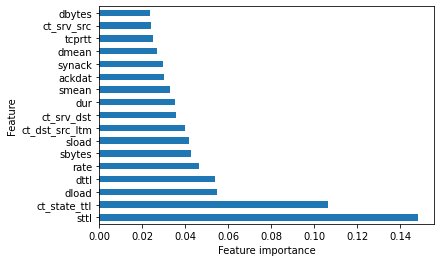

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(estimator.feature_importances_, index = X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

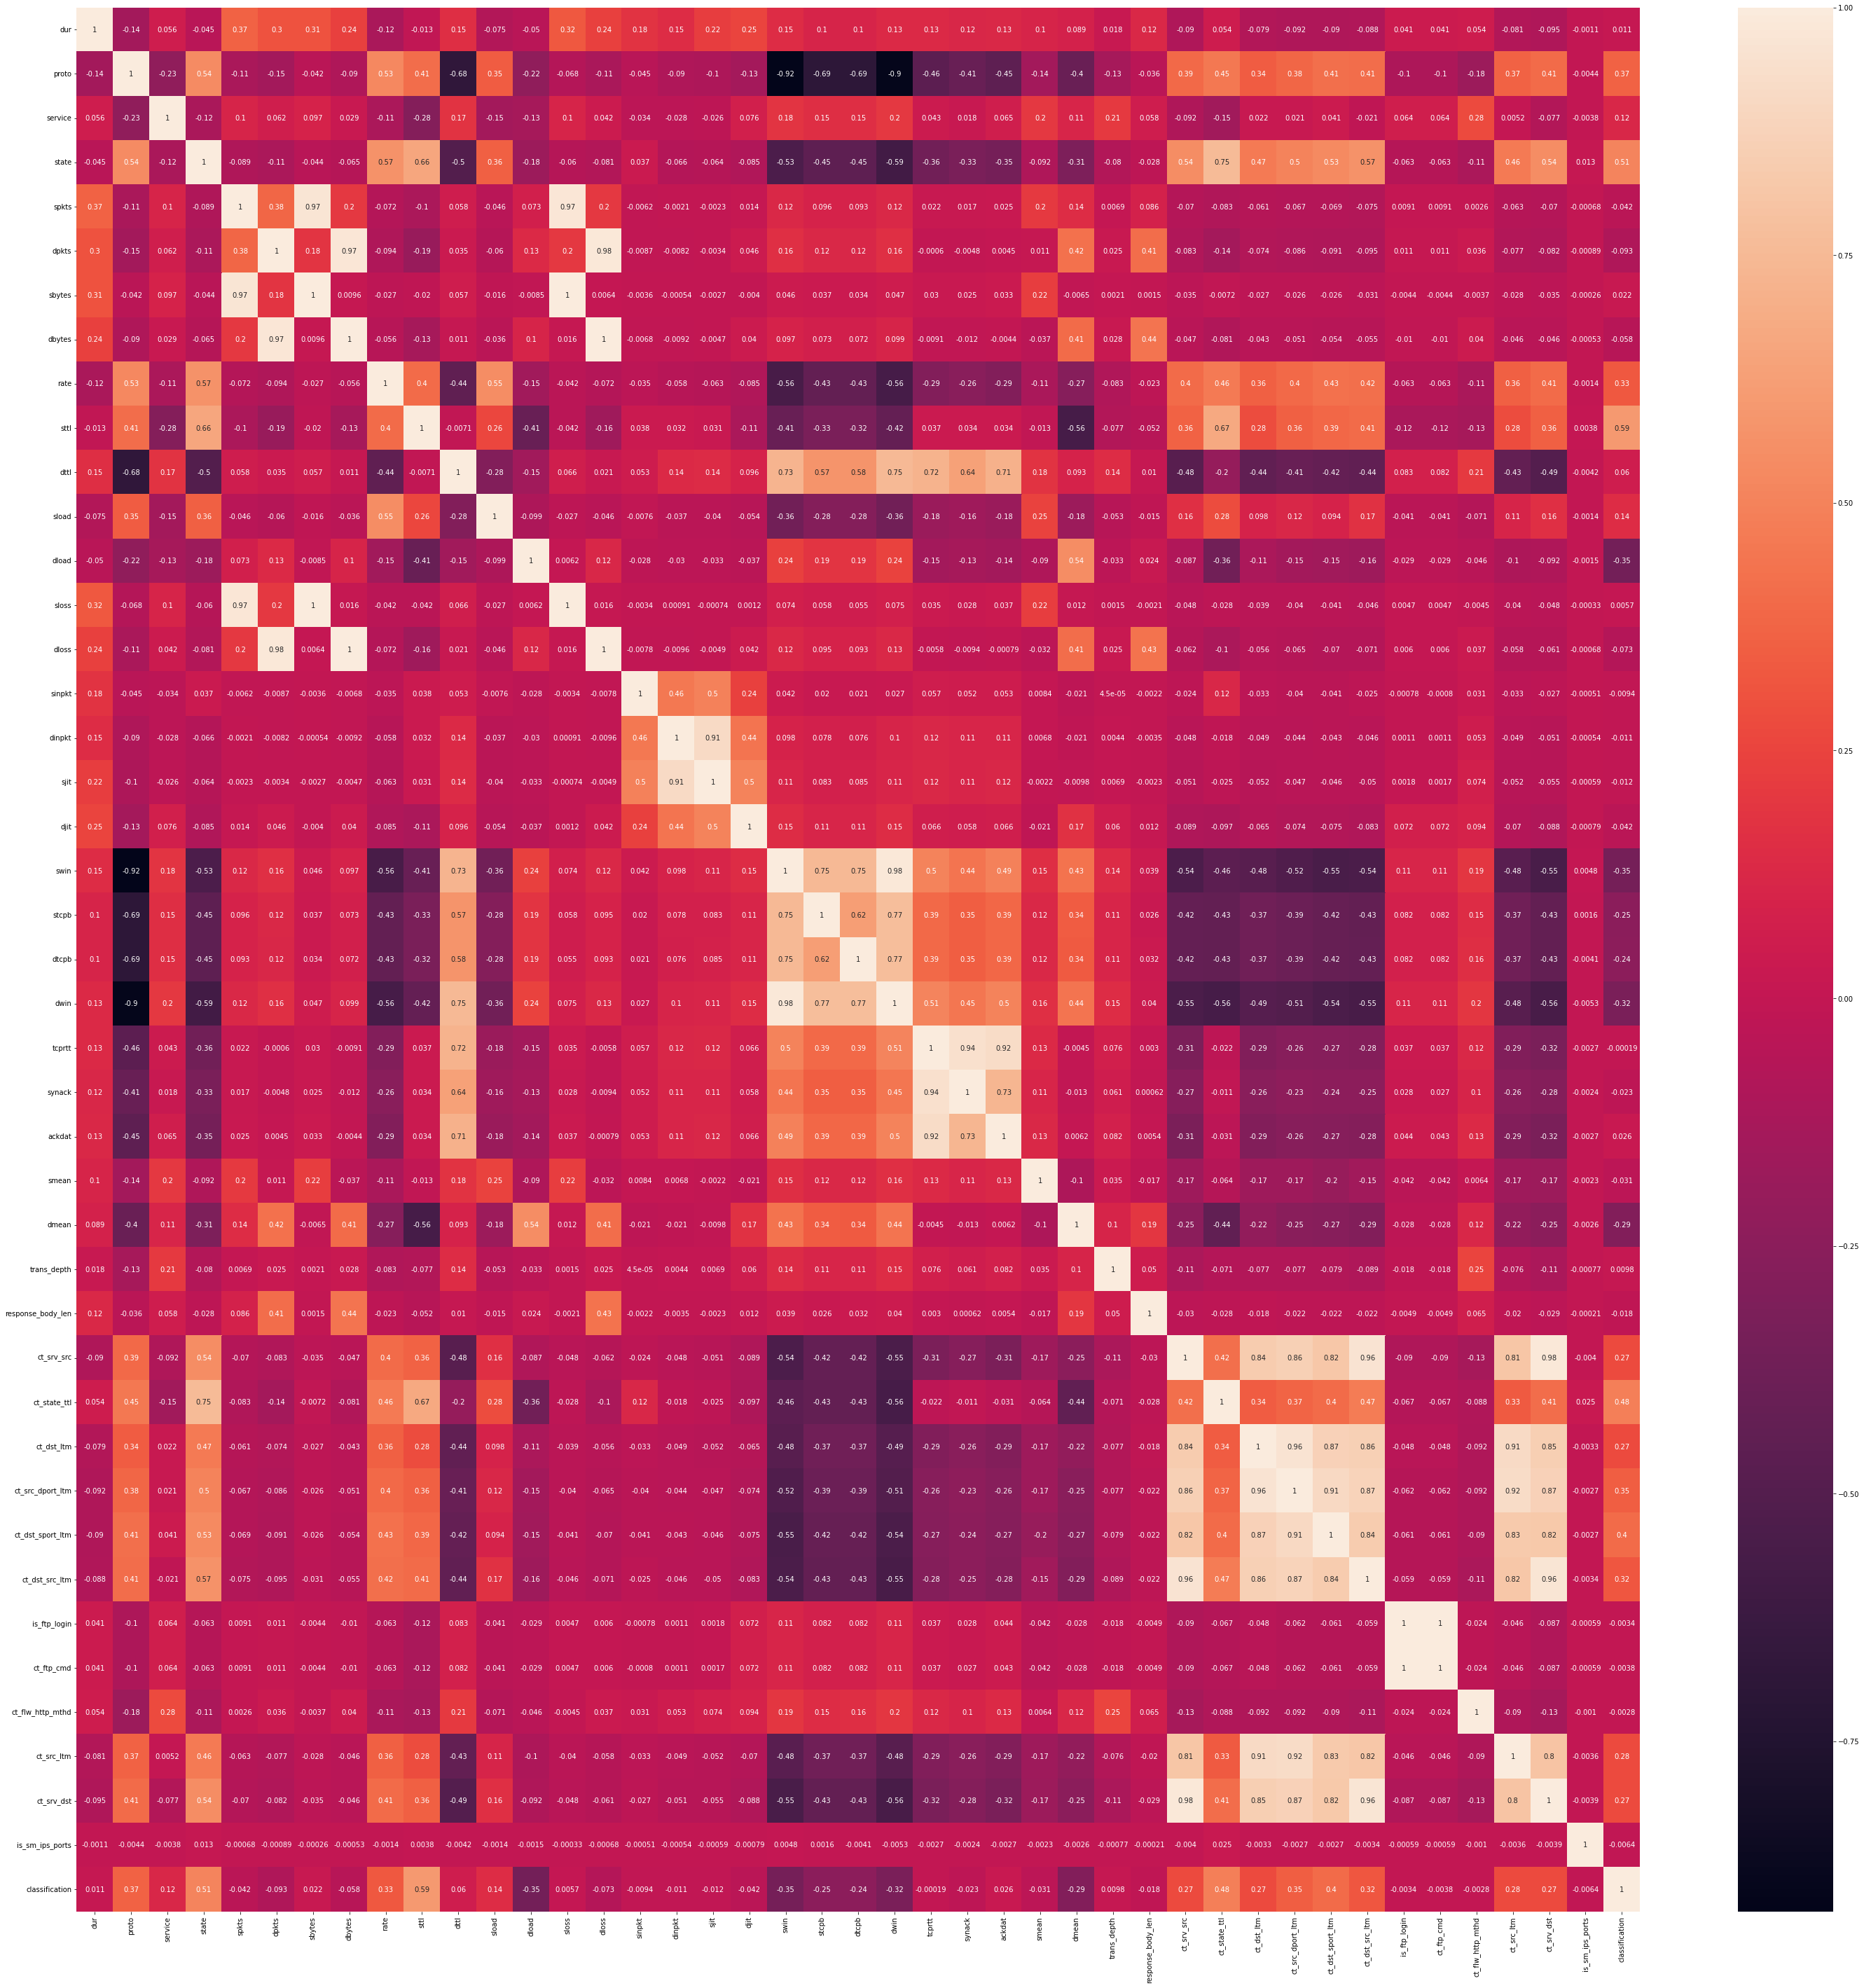

In [ ]:
plt.figure(figsize = (50,50))
_corr = df.corr(method = 'pearson')
ax = sns.heatmap(_corr,annot = True)

In [ ]:
x = _corr["classification"].apply(lambda x: abs(x))
x = x.sort_values(ascending = False)
x

classification       1.000000
sttl                 0.594822
state                0.508898
ct_state_ttl         0.484274
ct_dst_sport_ltm     0.402537
proto                0.367822
dload                0.354356
ct_src_dport_ltm     0.350720
swin                 0.349592
rate                 0.328091
ct_dst_src_ltm       0.323654
dwin                 0.321587
dmean                0.287719
ct_src_ltm           0.276364
ct_srv_dst           0.273529
ct_srv_src           0.272914
ct_dst_ltm           0.272644
stcpb                0.247601
dtcpb                0.244351
sload                0.144965
service              0.115502
dpkts                0.093206
dloss                0.072737
dttl                 0.059670
dbytes               0.057903
spkts                0.042248
djit                 0.042221
smean                0.031243
ackdat               0.026399
synack               0.022694
sbytes               0.021552
response_body_len    0.017680
sjit                 0.011623
dur       

In [ ]:
features = ["sttl",
            "state",
            "proto",
            "swin",
            "dwin",
            "dload",
            "ct_state_ttl",
            "rate",
            "ct_dst_sport_ltm",
            "ct_src_dport_ltm",
            "classification"]

In [ ]:
num_col = len(features)

In [ ]:
df = df[features]

In [ ]:
print(df.shape)
df.head()

(231341, 11)


,sttl,state,proto,swin,dwin,dload,ct_state_ttl,rate,ct_dst_sport_ltm,ct_src_dport_ltm,classification
0,0.995575,0.666667,0.5,0.0,0.0,0.0,0.333333,0.090909,0.0,0.000000,0.0
1,0.995575,0.666667,0.5,0.0,0.0,0.0,0.333333,0.125000,0.0,0.000000,0.0
2,0.995575,0.666667,0.5,0.0,0.0,0.0,0.333333,0.200000,0.0,0.000000,0.0
3,0.995575,0.666667,0.5,0.0,0.0,0.0,0.333333,0.166667,0.0,0.017241,0.0
4,0.995575,0.666667,0.5,0.0,0.0,0.0,0.333333,0.100000,0.0,0.017241,0.0


In [ ]:
#One hot encoding features
proto_encoded = pd.get_dummies(org_df["proto"])
state_encoded = pd.get_dummies(org_df["state"])

In [ ]:
Y = df["classification"]
df.drop(["proto","state","classification"],axis = 1,inplace = True)

In [ ]:
df = pd.concat([df,proto_encoded,state_encoded,Y],axis = 1)
df.head()

,sttl,swin,dwin,dload,ct_state_ttl,rate,ct_dst_sport_ltm,ct_src_dport_ltm,tcp,udp,unas,ACC,CLO,CON,FIN,INT,REQ,RST,classification
0,0.995575,0.0,0.0,0.0,0.333333,0.090909,0.0,0.000000,0,1,0,0,0,0,0,1,0,0,0.0
1,0.995575,0.0,0.0,0.0,0.333333,0.125000,0.0,0.000000,0,1,0,0,0,0,0,1,0,0,0.0
2,0.995575,0.0,0.0,0.0,0.333333,0.200000,0.0,0.000000,0,1,0,0,0,0,0,1,0,0,0.0
3,0.995575,0.0,0.0,0.0,0.333333,0.166667,0.0,0.017241,0,1,0,0,0,0,0,1,0,0,0.0
4,0.995575,0.0,0.0,0.0,0.333333,0.100000,0.0,0.017241,0,1,0,0,0,0,0,1,0,0,0.0


In [ ]:
df['classification'] = df['classification'].astype(int)

In [ ]:
_df = df.copy()
print(_df.shape)

(231341, 19)


In [ ]:
n = 2000
normal_df = _df.loc[_df['classification']==0].iloc[:n]

In [ ]:
normal_idx = normal_df.index.tolist()
print(len(normal_idx))
normal_df.reset_index(drop = True,inplace = True)

2000


In [ ]:
_df = _df.drop(normal_idx,axis = 0)
_df.reset_index(drop = True,inplace = True)
_df.head()

,sttl,swin,dwin,dload,ct_state_ttl,rate,ct_dst_sport_ltm,ct_src_dport_ltm,tcp,udp,unas,ACC,CLO,CON,FIN,INT,REQ,RST,classification
0,0.995575,0.0,0.0,0.000000,0.333333,0.062500,0.0,0.000000,0,1,0,0,0,0,0,1,0,0,1
1,0.146018,1.0,1.0,0.001335,0.166667,0.000076,0.0,0.017241,1,0,0,0,0,0,1,0,0,0,1
2,0.146018,1.0,1.0,0.001018,0.166667,0.000041,0.0,0.017241,1,0,0,0,0,0,1,0,0,0,1
3,0.995575,1.0,1.0,0.000309,0.166667,0.000058,0.0,0.000000,1,0,0,0,0,0,1,0,0,0,1
4,0.995575,1.0,1.0,0.000164,0.166667,0.000025,0.0,0.000000,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
n=2000
df_arr=[_df[i:i+n] for i in range(0,_df.shape[0],n)]

In [ ]:
len_df=len(df_arr)
print(len_df)

115


In [ ]:
testsize = 70
_frames=[]
for i in range(testsize):
    _frames.append(df_arr[i])
train_fr=pd.concat(_frames)


_frames.clear()
for i in range(testsize,len_df):
    _frames.append(df_arr[i])
test_fr=pd.concat(_frames)

In [ ]:
test_fr.reset_index(drop = True,inplace = True)

In [ ]:
print(test_fr.shape)
print(train_fr.shape)

(89341, 19)
(140000, 19)


In [ ]:
#Function to calculate Hellinger distance between two probability distributions
def hellinger(p, q):

  dis = math.sqrt(sum(
      [(math.sqrt(p_i) - math.sqrt(q_i))**2 for p_i, q_i in zip(p, q)]
      )/2)
  return dis

In [ ]:
##Function to get average probability distribution from a batch of probability distibutions 
def getProba(x_test, model, n):
  proba = model.predict_proba(x_test)
  t = [proba[0][0], proba[0][1]]
  for i in range(x_test.shape[0]):
    t[0]+=proba[i][0]
    t[1]+=proba[i][1]

  t[0]/=n
  t[1]/=n
  return t

In [ ]:
##Calculating Hellinger distance between the probability distribution of the training set and other batches
##input : model (Trained model on a classification ML algorithm)
##output : Hellinger distance between the training set and other remaining sets 
def hellingerForAll(normal_df,df,model,n) :
  m = normal_df.shape[1]
  model_proba = getProba(normal_df.iloc[:,0:m-1], model, n)

  cnt = len(df)
  dist = []
  for i in range(0, cnt):
    y_pred = getProba(df[i].iloc[:,0:m-1], model, n)
    dist.append(hellinger(model_proba, y_pred))
  return dist

In [ ]:
##Function to plot scatter plot 
##input : dist (A list containing the Hellinger distances of the different sets)
##        title (Title of Graph, a string)
def plotGraph(dist,df, title): 
  cnt = len(df)
  y = dist
  x = [i for i in range(0, cnt)]
  plt.scatter(x, y, label= "stars", color= "red",
              marker= "*", s=30)

  plt.xlabel('Batch number')
  plt.ylabel('Hellinger Distance')
  plt.title(title)
  plt.show()

In [ ]:
m = train_fr.shape[1]
x_train = train_fr.iloc[:,0:m-1]
y_train = train_fr.iloc[:,m-1]

x_test = test_fr.iloc[:,0:m-1]
y_test = test_fr.iloc[:,m-1]

In [ ]:
#Logistic Regression
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = lr_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9472582576868404
              precision    recall  f1-score   support

           0       0.51      0.20      0.28      4747
           1       0.96      0.99      0.97     84594

    accuracy                           0.95     89341
   macro avg       0.73      0.59      0.63     89341
weighted avg       0.93      0.95      0.94     89341



In [ ]:
hellinger_dist_lr = hellingerForAll(normal_df,df_arr[testsize:],lr_model,n)
hellinger_dist_lr

[0.5327260478410448,
 0.5516757179895262,
 0.5482135274898525,
 0.4957546437378299,
 0.5033707243830351,
 0.5197140453911213,
 0.5511793147079167,
 0.4620645256448004,
 0.5428291314365546,
 0.5354821241140291,
 0.5223633128320048,
 0.4944379963979454,
 0.41945609600743455,
 0.49854673380071274,
 0.5522805973036089,
 0.5970335465706442,
 0.5269554434830472,
 0.5745386023016148,
 0.6437942896409852,
 0.6233194921251571,
 0.6452829068214113,
 0.6804267760861231,
 0.6918856254441602,
 0.684636407843741,
 0.6736641440759846,
 0.7032582308974248,
 0.6678858127917529,
 0.675179113862602,
 0.6745766365646897,
 0.7028424682254876,
 0.6757615312471597,
 0.6961242310957554,
 0.6968166870777764,
 0.7085609757224116,
 0.7237496514435413,
 0.7167993765523151,
 0.7086600473944245,
 0.7160214040058288,
 0.7167034501235388,
 0.6932601485807276,
 0.6904625414935276,
 0.7000338145597385,
 0.7040329350743576,
 0.7163682278632424,
 0.6668725238743596]

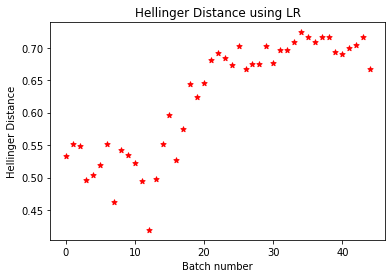

In [ ]:
##Plotting the calculated Hellinger distances
plotGraph(hellinger_dist_lr,df_arr[testsize:], 'Hellinger Distance using LR')

In [ ]:
#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8522962581569492
              precision    recall  f1-score   support

           0       0.23      0.74      0.35      4747
           1       0.98      0.86      0.92     84594

    accuracy                           0.85     89341
   macro avg       0.60      0.80      0.63     89341
weighted avg       0.94      0.85      0.89     89341



In [ ]:
hellinger_dist_rf = hellingerForAll(normal_df,df_arr[testsize:],rf_model,n)
hellinger_dist_rf

[0.5685505111523586,
 0.5844332386510683,
 0.5876621614306199,
 0.5289053074024445,
 0.5314041737597213,
 0.564098290032655,
 0.5575258015311282,
 0.5072845676697271,
 0.5561551472506657,
 0.5741648353109913,
 0.5663334948529594,
 0.5289304256685233,
 0.45379854212246346,
 0.540185410158144,
 0.5931590886760839,
 0.6420603977291478,
 0.5812223333837018,
 0.6263955925540806,
 0.6953302339719952,
 0.6815119517953575,
 0.690825119867571,
 0.7466364434584831,
 0.7558993499595035,
 0.7368380418975593,
 0.7395809851792234,
 0.7632055702120271,
 0.7312925143712876,
 0.7392426839046952,
 0.7284296788689237,
 0.7686106496967435,
 0.7268604243425651,
 0.7594442236832559,
 0.7587088203098383,
 0.761501674623887,
 0.775023260158423,
 0.7659106441113369,
 0.7518733320762504,
 0.7699566995590911,
 0.7699591890587144,
 0.7398805656635433,
 0.7482005970901415,
 0.7578108700572832,
 0.7467147914427088,
 0.7711743073732616,
 0.7233084249226598]

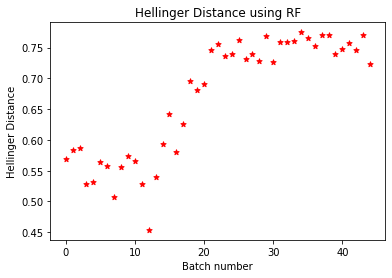

In [ ]:
##Plotting the calculated Hellinger distances
plotGraph(hellinger_dist_rf,df_arr[testsize:], 'Hellinger Distance using RF')

In [ ]:
#K Nearest Neighbour
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8421553374150725
              precision    recall  f1-score   support

           0       0.21      0.73      0.33      4747
           1       0.98      0.85      0.91     84594

    accuracy                           0.84     89341
   macro avg       0.60      0.79      0.62     89341
weighted avg       0.94      0.84      0.88     89341



In [ ]:
hellinger_dist_knn = hellingerForAll(normal_df,df_arr[testsize:],knn_model,n)
hellinger_dist_knn

[0.5709414418259287,
 0.5898984115534373,
 0.5945709200271547,
 0.533741829928995,
 0.5382950184864288,
 0.5666812093418278,
 0.5613467459048755,
 0.5213249914229348,
 0.5604310591271551,
 0.5805285065723335,
 0.5729362099811653,
 0.5386060061349218,
 0.464520848652593,
 0.548631865834076,
 0.6022280565302215,
 0.6516751734941947,
 0.6015991044537605,
 0.6368569336555869,
 0.7088261828332834,
 0.6886300651239309,
 0.7026446964898465,
 0.7579648450427943,
 0.7647524001645634,
 0.7462972009215699,
 0.7484465556514629,
 0.7671716403473854,
 0.7386424796838205,
 0.7488901060045203,
 0.7390669681944844,
 0.7755865168244471,
 0.7341268532170142,
 0.7669282794606027,
 0.7703654983373937,
 0.7688229075334176,
 0.7855948674534832,
 0.7766115589630664,
 0.7620677210815323,
 0.7744407309665262,
 0.7790064199146287,
 0.7475070359694175,
 0.7600640819677201,
 0.7659580545364134,
 0.7567505153683526,
 0.7790716317047937,
 0.7368705274991963]

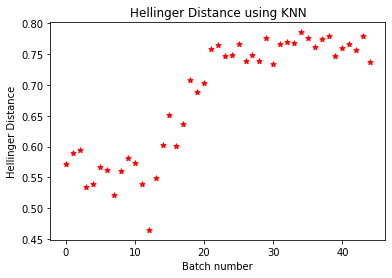

In [ ]:
##Plotting the calculated Hellinger distances
plotGraph(hellinger_dist_knn,df_arr[testsize:], 'Hellinger Distance using KNN')

In [ ]:
##Using Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6527350264716087
              precision    recall  f1-score   support

           0       0.11      0.82      0.20      4747
           1       0.98      0.64      0.78     84594

    accuracy                           0.65     89341
   macro avg       0.55      0.73      0.49     89341
weighted avg       0.94      0.65      0.75     89341



In [ ]:
hellinger_dist_nb = hellingerForAll(normal_df,df_arr[testsize:],nb_model,n)
hellinger_dist_nb

[0.3654625639549634,
 0.41654879637782777,
 0.3641380607182102,
 0.20984146144812685,
 0.2575208647282287,
 0.3102769971170323,
 0.33286903364101594,
 0.269067431210085,
 0.37699482704513987,
 0.316464926242186,
 0.2903844807006898,
 0.21396927778504515,
 0.2535500290814546,
 0.25757970499221533,
 0.37126643099760154,
 0.4409775102053202,
 0.30811702985272593,
 0.42259401383618594,
 0.5736808741552476,
 0.5153424491449724,
 0.5753750699301954,
 0.6437554549041856,
 0.666958952627171,
 0.6533961991119194,
 0.6349138871177642,
 0.6954914598577487,
 0.6284398707436958,
 0.6235816480305262,
 0.6294820104524352,
 0.6889985191436555,
 0.6383032820204969,
 0.6824339671388181,
 0.6792509541538303,
 0.691249416797199,
 0.7186935505102793,
 0.7102687925627095,
 0.6929645361171746,
 0.7148992722364865,
 0.7016598446052137,
 0.6589563533073827,
 0.6635310554268541,
 0.678960690436811,
 0.6815657476061224,
 0.7111872366406818,
 0.6725824391744744]

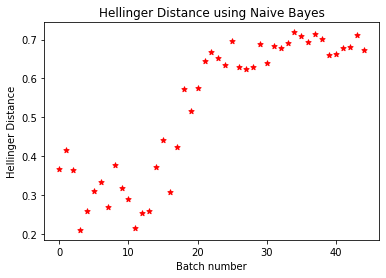

In [ ]:
plotGraph(hellinger_dist_nb,df_arr[testsize:], 'Hellinger Distance using Naive Bayes')

In [ ]:
svm_model = svm.SVC(probability=True)
svm_model.fit(x_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
y_pred = svm_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
hellinger_dist_svm = hellingerForAll(normal_df,df_arr[testsize:],svm_model,n)
hellinger_dist_svm

In [ ]:
plotGraph(hellinger_dist_svm,df_arr[testsize:], 'Hellinger Distance using SVM')

#Threshold Calculation
Case 1: UL = mu(Mean)

In [ ]:
##Function to calculate the mean and standard deviation of a list of Hellinger distances
def uhl(dist):
  dist = np.array(dist)
  mean = np.mean(dist)
  stddev = np.std(dist)
  return mean,stddev

In [ ]:
##Function to plot the Hellinger distances along with thresholds
def plot(dist, mean, stddev, i, title):
  y = dist
  x = [i for i in range(1, len(dist)+1)]
  # plt.axhline(y = uhl, color = 'blue') ##Upper limit passed in function
  plt.axhline(y = mean + i*(stddev/2), color = 'green') ##Varying the threshold by adding standard deviation 
  # plt.axhline(y = uhl - stddev/2, color = 'yellow') ##Varying the threshold by subtracting standard deviation
  # plt.scatter(x, y, label= "stars", color= "red",
              # marker= ".", s=30)
  plt.plot(x, y)

  plt.xlabel('Batch number')
  plt.ylabel('Hellinger Distance')
  plt.title(title)
  plt.show()

In [ ]:
mean_lr, stddev_lr = uhl(hellinger_dist_lr)
mean_rf, stddev_rf = uhl(hellinger_dist_rf)
mean_svm, stddev_svm = uhl(hellinger_dist_svm) 
mean_knn, stddev_knn = uhl(hellinger_dist_knn)
mean_nb, stddev_nb = uhl(hellinger_dist_nb)

In [ ]:
##Returns list of labels for all the frames
## 1 : attack, 0: normal
##input : hellinger_dis = list of the calculated Hellinger distances
##        mean = (mu) mean of the Hellinger distances 
##        stddev = standard deviation of the Hellinger distances
##        i = i for different cases {-1, 0, 1}

def list_of_labels(hellinger_dis, mean, stddev, i):
  uhl = mean + i * stddev/2
  l = []
  for i in range(0, len(hellinger_dis)):
    if hellinger_dis[i] <= uhl:
      l.append(0)
    else:
      l.append(1)

  return l

In [ ]:
test_list_lr =  list_of_labels(hellinger_dist_lr, mean_lr, stddev_lr, 0)
test_list_nb = list_of_labels(hellinger_dist_nb, mean_nb, stddev_nb, 0)
test_list_svm = list_of_labels(hellinger_dist_svm, mean_svm, stddev_svm, 0)
test_list_knn = list_of_labels(hellinger_dist_knn, mean_knn, stddev_knn, 0)
test_list_rf = list_of_labels(hellinger_dist_rf, mean_rf, stddev_rf, 0)

In [ ]:
real = []
for i in range(testsize, len_df):
  if 1 in df_arr[i]['classification'].values:
    real.append(1)
  else:
    real.append(0)

In [ ]:
##Function to return the metrics
## tp : True Positive
## tn : True Negative
## fp : False Positive
## fn : False Negative

def give_metrics(real, predicted):
  tp, tn, fp, fn = 0, 0, 0, 0
  for i in range(0, len(predicted)):
    if(real[i] == 1 and real[i] == predicted[i]):
      tp+=1

    elif real[i] == 1 and predicted[i] == 0:
      fn+=1

    elif real[i] == 0 and predicted[i] == 1:
      fp+=1

    else:
      tn+=1

  return tp, tn, fp, fn


In [ ]:
##Function to calculate the evaluation metrics 
## Precision, Recall, Accuracy, F1 score

def checker(tp, tn, fp, fn):
  precision, recall, accuracy, f1 = 0, 0, 0, 0
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  f1 = (2*precision*recall)/(precision+recall)

  dic = {"precision" : precision, "recall" : recall, "accuracy" : accuracy, "f1_score" : f1}

  # print(precision," ", recall," ", accuracy," ", f1)
  return dic

In [ ]:
test_lists = [test_list_lr, test_list_nb,test_list_svm, test_list_knn,test_list_rf]  #TODO: SVM

In [ ]:
# Case 1: Threshold Values
print("LR: ",mean_lr)
print("KNN: ",mean_knn)
print("NB: ",mean_nb)
# print("SVM: ",mean_svm)
print("RF: ",mean_rf)

LR:  0.62279114626491
KNN:  0.6796871260929613
NB:  0.5245232660864023
RF:  0.6710222303776181


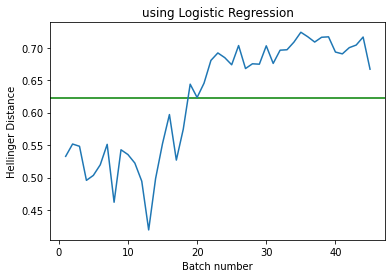

In [ ]:
plot(hellinger_dist_lr, mean_lr, stddev_lr, 0, "using Logistic Regression")

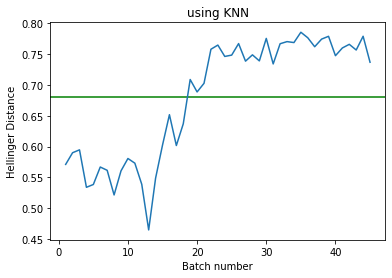

In [ ]:
plot(hellinger_dist_knn, mean_knn, stddev_knn, 0, "using KNN")

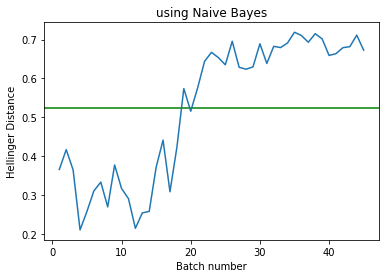

In [ ]:
plot(hellinger_dist_nb, mean_nb, stddev_nb, 0, "using Naive Bayes")

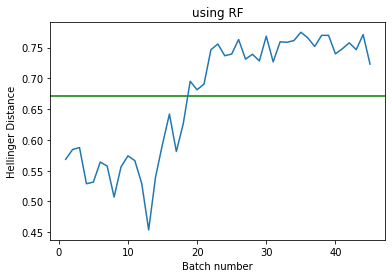

In [ ]:
plot(hellinger_dist_rf, mean_rf, stddev_rf, 0, "using RF")

In [ ]:
plot(hellinger_dist_svm, mean_svm, stddev_svm, 0, "using SVM")

In [ ]:
##Function to return evaluation metrics for all the four algorithms in sequence : Logistic Regression, Naive Bayes, SVM, k Nearest Neighbor
## Returns a list of dictionary with precision, recall, accuracy and f1 score of all the algorithms
def total_metrics(test_lists):
  l = []

  for i in range(len(test_lists)):
    tp, tn, fp, fn = give_metrics(real, test_lists[i])
    temp = checker(tp, tn, fp, fn)
    l.append(temp)
  
  return l

In [ ]:
metrics_case_1 = total_metrics(test_lists) ##0 : logistic regression, 1 : naive bayes, 2 : k nearest neighbors, 3: RF
for dic in metrics_case_1:
  print(dic)

{'precision': 1.0, 'recall': 0.6, 'accuracy': 0.6, 'f1_score': 0.7499999999999999}
{'precision': 1.0, 'recall': 0.5777777777777777, 'accuracy': 0.5777777777777777, 'f1_score': 0.732394366197183}
{'precision': 1.0, 'recall': 0.6, 'accuracy': 0.6, 'f1_score': 0.7499999999999999}
{'precision': 1.0, 'recall': 0.6, 'accuracy': 0.6, 'f1_score': 0.7499999999999999}


Case 2: UL = mean + stddev/2

In [ ]:
test_list_lr =  list_of_labels(hellinger_dist_lr, mean_lr, stddev_lr, 1)
test_list_nb = list_of_labels(hellinger_dist_nb, mean_nb, stddev_nb, 1)
test_list_svm = list_of_labels(hellinger_dist_svm, mean_svm, stddev_svm, 1)
test_list_knn = list_of_labels(hellinger_dist_knn, mean_knn, stddev_knn,1)
test_list_rf = list_of_labels(hellinger_dist_rf, mean_rf, stddev_rf, 1)

In [ ]:
test_lists = [test_list_lr, test_list_nb,test_list_svm, test_list_knn,test_list_rf]  #TODO: SVM

In [ ]:
# Case 2: Threshold Values
print("LR: ",mean_lr + stddev_lr/2)
print("KNN: ",mean_knn + stddev_knn/2)
print("NB: ",mean_nb + stddev_nb/2)
print("SVM: ",mean_svm + stddev_svm/2)
print("RF: ",mean_rf + stddev_rf/2)

LR:  0.666173760958895
KNN:  0.7278198558431775
NB:  0.6122844439819356
RF:  0.7189149336240702


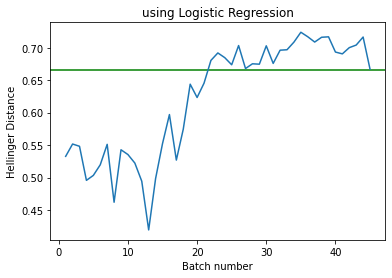

In [ ]:
plot(hellinger_dist_lr, mean_lr, stddev_lr, 1, "using Logistic Regression")

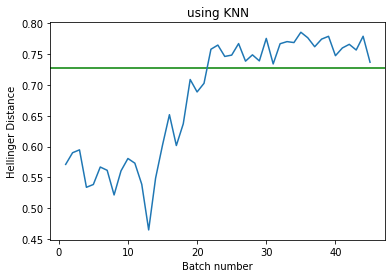

In [ ]:
plot(hellinger_dist_knn, mean_knn, stddev_knn, 1, "using KNN")

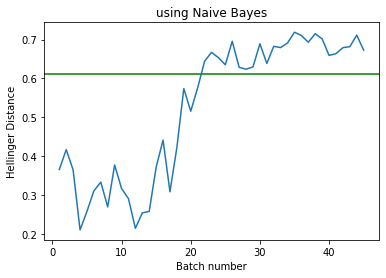

In [ ]:
plot(hellinger_dist_nb, mean_nb, stddev_nb, 1, "using Naive Bayes")

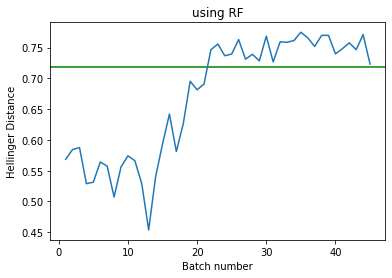

In [ ]:
plot(hellinger_dist_rf, mean_rf, stddev_rf, 1, "using RF")

In [ ]:
plot(hellinger_dist_svm, mean_svm, stddev_svm, 1, "using SVM")

In [ ]:
metrics_case_2 = total_metrics(test_lists) ##0 : logistic regression, 1 : naive bayes, 2 : k nearest neighbors, 3: RF
for dic in metrics_case_2:
  print(dic)

{'precision': 1.0, 'recall': 0.5333333333333333, 'accuracy': 0.5333333333333333, 'f1_score': 0.6956521739130436}
{'precision': 1.0, 'recall': 0.5333333333333333, 'accuracy': 0.5333333333333333, 'f1_score': 0.6956521739130436}
{'precision': 1.0, 'recall': 0.5333333333333333, 'accuracy': 0.5333333333333333, 'f1_score': 0.6956521739130436}
{'precision': 1.0, 'recall': 0.5333333333333333, 'accuracy': 0.5333333333333333, 'f1_score': 0.6956521739130436}


Case 3: UL = mean - stddev/2

In [ ]:
test_list_lr =  list_of_labels(hellinger_dist_lr, mean_lr, stddev_lr, -1)
test_list_nb = list_of_labels(hellinger_dist_nb, mean_nb, stddev_nb, -1)
test_list_svm = list_of_labels(hellinger_dist_svm, mean_svm, stddev_svm, -1)
test_list_knn = list_of_labels(hellinger_dist_knn, mean_knn, stddev_knn,-1)
test_list_rf = list_of_labels(hellinger_dist_rf, mean_rf, stddev_rf, -1)

In [ ]:
test_lists = [test_list_lr, test_list_nb,test_list_svm, test_list_knn,test_list_rf]  #TODO: SVM

In [ ]:
# Case 3: Threshold Values
print("LR: ",mean_lr - stddev_lr/2)
print("KNN: ",mean_knn - stddev_knn/2)
print("NB: ",mean_nb - stddev_nb/2)
print("SVM: ",mean_svm - stddev_svm/2)
print("RF: ",mean_rf - stddev_rf/2)

LR:  0.5794085315709249
KNN:  0.6315543963427451
NB:  0.43676208819086904
RF:  0.623129527131166


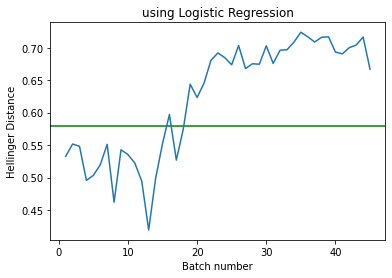

In [ ]:
plot(hellinger_dist_lr, mean_lr, stddev_lr, -1, "using Logistic Regression")

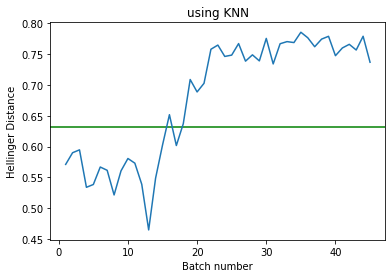

In [ ]:
plot(hellinger_dist_knn, mean_knn, stddev_knn, -1, "using KNN")

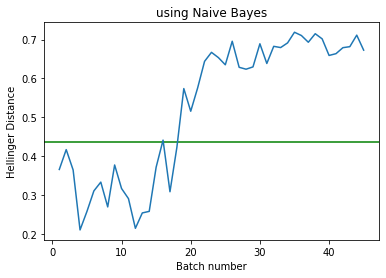

In [ ]:
plot(hellinger_dist_nb, mean_nb, stddev_nb, -1, "using Naive Bayes")

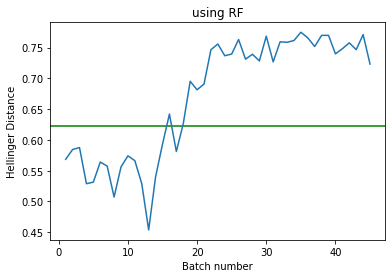

In [ ]:
plot(hellinger_dist_rf, mean_rf, stddev_rf, -1, "using RF")

In [ ]:
plot(hellinger_dist_svm, mean_svm, stddev_svm, -1, "using SVM")

In [ ]:
metrics_case_3 = total_metrics(test_lists) ##0 : logistic regression, 1 : naive bayes, 2 : k nearest neighbors, 3: RF
for dic in metrics_case_3:
  print(dic)

{'precision': 1.0, 'recall': 0.6222222222222222, 'accuracy': 0.6222222222222222, 'f1_score': 0.7671232876712328}
{'precision': 1.0, 'recall': 0.6222222222222222, 'accuracy': 0.6222222222222222, 'f1_score': 0.7671232876712328}
{'precision': 1.0, 'recall': 0.6444444444444445, 'accuracy': 0.6444444444444445, 'f1_score': 0.7837837837837839}
{'precision': 1.0, 'recall': 0.6444444444444445, 'accuracy': 0.6444444444444445, 'f1_score': 0.7837837837837839}
